In [101]:
import matplotlib.pyplot as plt 
import pandas as pd

In [102]:
rpidf = pd.read_csv('../saved_results/pi/pi2.csv') 
frododf_1= pd.read_csv('../saved_results/frodo/frodo2.csv')  #1 GPU
frododf_3 = pd.read_csv('../saved_results/frodo/frodo3.csv') #2 GPU 
mac_df = pd.read_csv('../saved_results/mac/mac2.csv')

frodo_avg = pd.read_csv('../saved_results/frodo/f_averages.csv')

In [103]:
neurons = []
pi_times = []
frodo_times_1 = []
frodo_times_3 = []
mac_times = []
frod_times_avg = []

for i in rpidf.values.tolist():
    neurons.append(i[0])
    pi_times.append(i[1])
for i in frododf_1.values.tolist():
        frodo_times_1.append(i[1])
for i in frododf_3.values.tolist():
        frodo_times_3.append(i[1])
for i in mac_df.values.tolist():
        mac_times.append(i[1])
for i in frodo_avg.values.tolist():
        frod_times_avg.append(i[2])

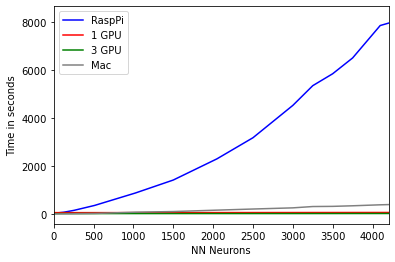

In [104]:
plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons, pi_times, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.plot(neurons, mac_times, 'gray', label='Mac')
#plt.plot(neurons, frod_times_avg, label='average')
plt.legend()
plt.savefig('../saved_results/figures/raw_comparison.png')
img = plt.show()

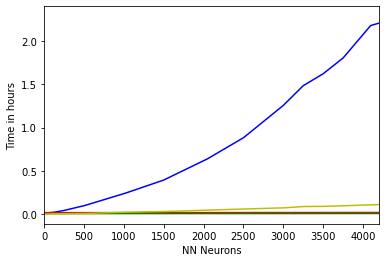

In [105]:
pi_timesh = [t/3600 for t in pi_times]
frodo_times_1h = [t/3600 for t in frodo_times_1]
frodo_times_3h = [t/3600 for t in frodo_times_3]
mac_timesh = [t/3600 for t in mac_times]

plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in hours')
plt.plot(neurons, pi_timesh, 'b')
plt.plot(neurons, frodo_times_1h, 'r')
plt.plot(neurons, frodo_times_3h, 'g')
plt.plot(neurons, mac_timesh, 'y', label='Mac')
plt.savefig('../saved_results/figures/raw_comparison_hours.png')
plt.show()


In [106]:
## Zoom in

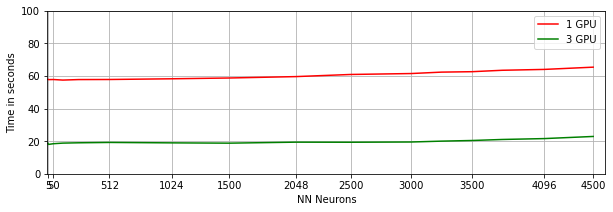

In [107]:
ticks = [5,50,512,1024,1500,2048,2500,3000,3500,4096,4500]

plt.figure(figsize=(10,3))
plt.xlim(0,4600)
plt.ylim(0,100)
plt.xticks(ticks)
plt.grid(True)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
#plt.plot(neurons, pi_times, 'b')
#plt.plot(neurons, mac_times, 'gray', label='Mac')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.legend()
plt.savefig('../saved_results/figures/gpu1v3.png', bbox_inches='tight')
plt.show()

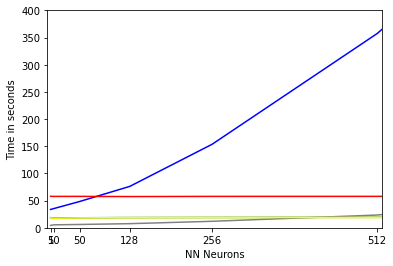

In [108]:
plt.xticks(neurons)
plt.xlim(0,520)
plt.ylim(0,400)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')

plt.plot(neurons, pi_times, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.plot(neurons, mac_times, 'gray', label='Mac')
plt.plot(neurons, frod_times_avg, 'yellow' ,label='average')
plt.show()

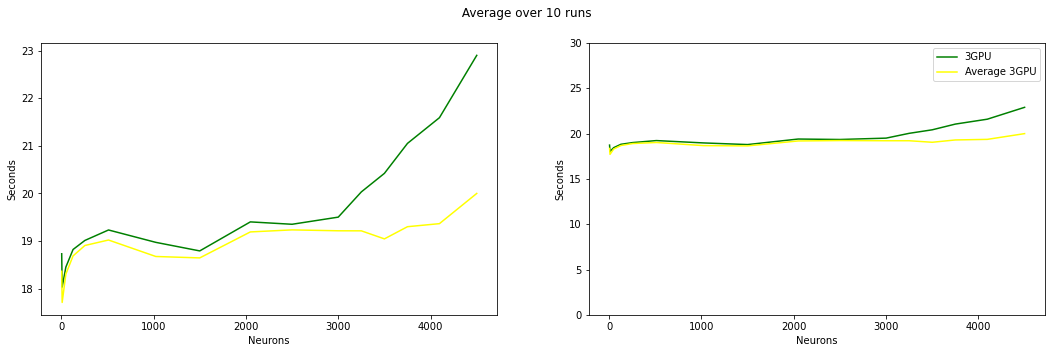

In [109]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
fig.suptitle(' Average over 10 runs ')
ax1.set(xlabel='Neurons', ylabel='Seconds')
ax1.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax1.plot(neurons, frod_times_avg, 'yellow' ,label='Average')

ax2.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax2.plot(neurons, frod_times_avg, 'yellow' ,label='Average 3GPU')
ax2.set_ylim(0,30)
ax2.set(xlabel='Neurons', ylabel='Seconds')
plt.legend()

plt.savefig('../saved_results/figures/gpu_comp.png', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.


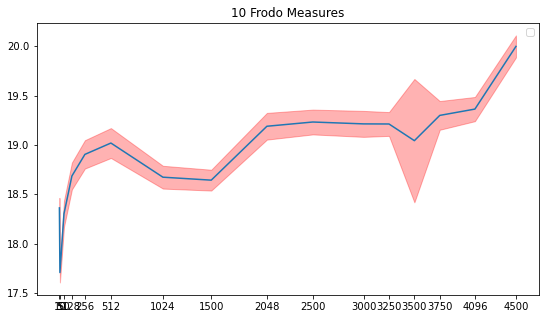

In [185]:
# Comparing the 10 measures used for the 'average'
dfs = []
for i in range(10):
    dfs.append(pd.read_csv('../saved_results/frodo/' + str(i+1) + '.csv')) 

times1 =[]
for i in dfs[0].values.tolist():
    times1.append(i[1])
times1
times = {}
for j in range(10):
    times[j] = []
    for i in dfs[j].values.tolist():
        times[j].append(i[1])

times[0]

plt.figure(figsize=(9,5))
plt.title('10 Frodo Measures')
# for i in range(10):
#     plt.plot(neurons, times[i], label=i)
min = np.asarray(frod_times_avg)-np.asarray(stds) 
max = np.asarray(frod_times_avg)+np.asarray(stds)

#plt.xticks(neurons)
plt.plot(neurons, frod_times_avg)#,
#         neurons, min,
#         neurons,max )

plt.fill_between(neurons,min.tolist(),max.tolist(),alpha=.3, color='red')
plt.legend()
plt.savefig('../saved_results/figures/10measures.png', bbox_inches='tight')
plt.show()

{0: [18.51, 17.77, 18.36, 18.77, 19.01, 19.3, 18.78, 18.67, 19.26, 19.39, 19.34, 19.36, 19.33, 19.32, 19.5, 20.04], 1: [18.19, 17.59, 18.2, 18.51, 18.78, 18.79, 18.53, 18.53, 19.14, 19.12, 19.06, 19.1, 19.11, 19.22, 19.25, 19.83], 2: [18.37, 17.75, 18.36, 18.72, 18.92, 18.99, 18.7, 18.66, 18.92, 19.25, 19.27, 19.29, 19.27, 19.35, 19.38, 20.04], 3: [18.35, 17.66, 18.15, 18.53, 18.72, 19.04, 18.6, 18.63, 19.14, 19.1, 19.14, 19.15, 19.12, 19.15, 19.52, 19.95], 4: [18.53, 17.84, 18.54, 18.86, 19.15, 19.2, 18.81, 18.85, 19.42, 19.47, 19.42, 19.35, 19.49, 19.52, 19.53, 20.19], 5: [18.24, 17.53, 18.21, 18.5, 18.69, 18.85, 18.59, 18.47, 19.05, 19.11, 19.02, 19.04, 19.09, 19.19, 19.15, 19.86], 6: [18.4, 17.85, 18.46, 18.75, 19.03, 19.11, 18.82, 18.77, 19.32, 19.3, 19.33, 19.31, 19.32, 19.49, 19.38, 19.9], 7: [18.35, 17.66, 18.23, 18.57, 18.96, 18.97, 18.58, 18.57, 19.19, 19.19, 19.22, 19.07, 17.2, 19.18, 19.28, 20.13], 8: [18.39, 17.77, 18.39, 18.86, 18.99, 19.07, 18.8, 18.68, 19.29, 19.3, 19.2

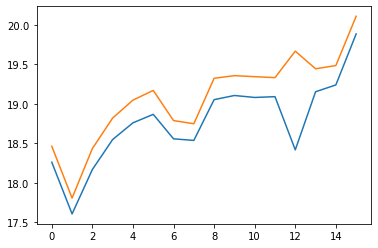

In [179]:
import numpy as np
nptimes = np.asarray(times[0])

stds = []
timesarray = []
timesdic = {}
for j in range(16):
    timesdic[j] = []
    for i in range(10):
        #print(times[i])
        timesdic[j].append(times[i][j])
    #print(timesdic[j])
    stds.append(np.std(np.asarray(timesdic[j])))

print(times)
timesdic
stds
print(np.asarray(frod_times_avg)-np.asarray(stds))
min = np.asarray(frod_times_avg)-np.asarray(stds)
max = np.asarray(frod_times_avg)+np.asarray(stds)
plt.plot(min)
plt.plot(max)




#plt.fill_between(range(6),means-stds,means+stds,alpha=.1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


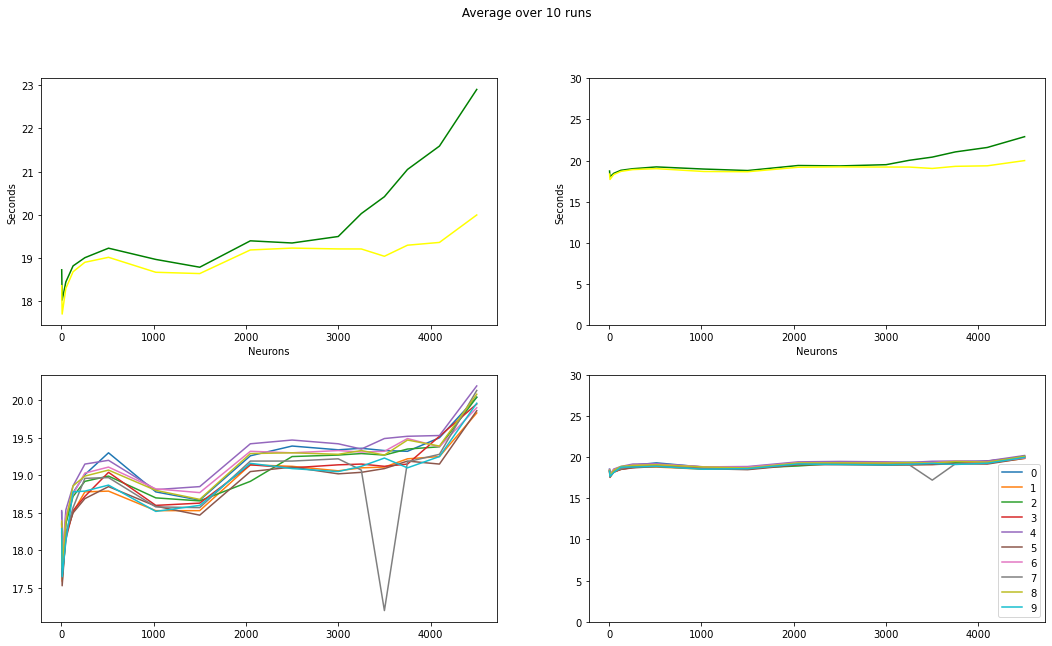

In [157]:
# Combination 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,10))
fig.suptitle(' Average over 10 runs ')
ax1.set(xlabel='Neurons', ylabel='Seconds')
ax1.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax1.plot(neurons, frod_times_avg, 'yellow' ,label='Average')

ax2.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax2.plot(neurons, frod_times_avg, 'yellow' ,label='Average 3GPU')
ax2.set_ylim(0,30)
ax2.set(xlabel='Neurons', ylabel='Seconds')
plt.legend()


#ax3.title('10 Frodo Measures')
for i in range(10):
    ax3.plot(neurons, times[i], label=i)
plt.legend()

ax4.set_ylim(0,30)
#ax4.title('10 Frodo Measures')
for i in range(10):
    ax4.plot(neurons, times[i], label=i)
plt.legend()


plt.savefig('../saved_results/figures/average_comp.png', bbox_inches='tight')
plt.show()

In [ ]:
def plot(fig):
    fig.plot(neurons, pi_times, 'b', label = 'RaspPi')
    fig.plot(neurons, frodo_times_1, 'r', label = '1 GPU')
    fig.plot(neurons, frodo_times_3, 'g', label = '3 GPU')
    fig.plot(neurons, mac_times, 'gray', label='Mac')
    fig.legend()


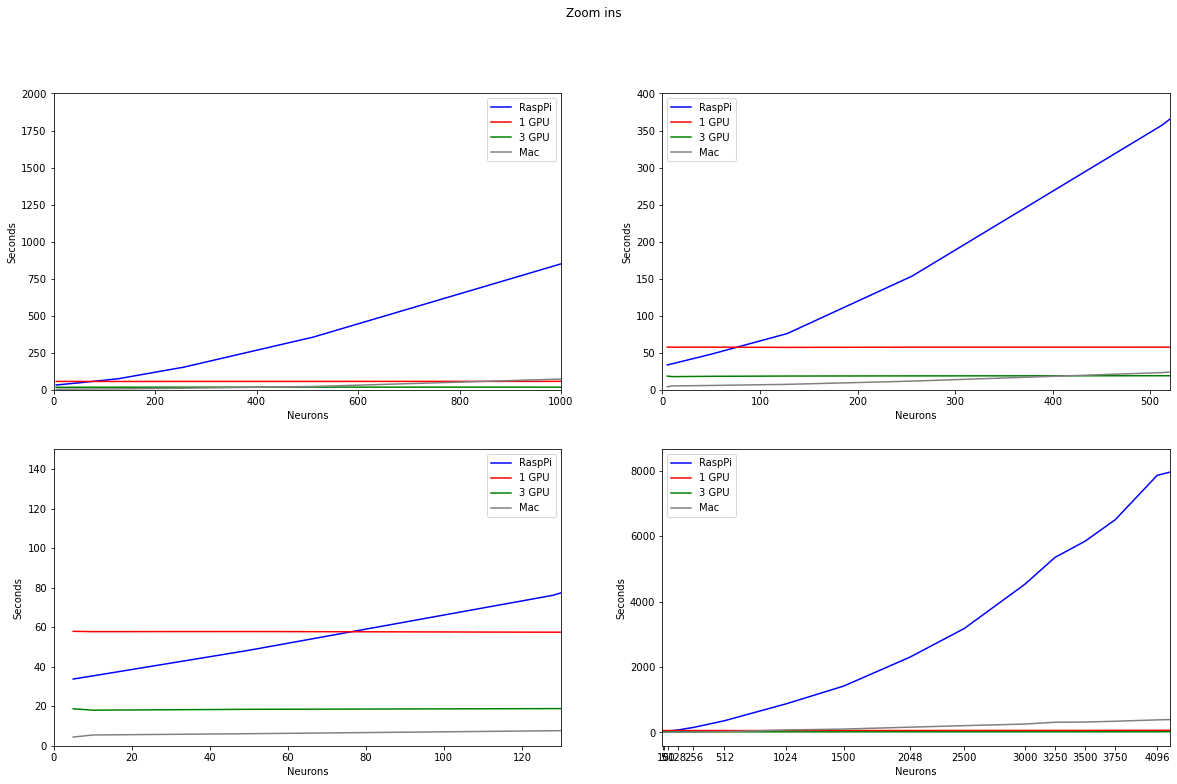

In [ ]:
fig, axs = plt.subplots(2,2 , figsize=(20,12))
fig.suptitle('Zoom ins')
axs[0,0].set_xlim(0,1000)
axs[0,0].set_ylim(0,2000)

plot(axs[0,0])

plt.xticks(neurons)
axs[0,1].set_xlim(0,520)
axs[0,1].set_ylim(0,400)
#axs[0,1].set_xticks(neurons)
plot(axs[0,1])


axs[1,0].set_xlim(0,130)
axs[1,0].set_ylim(0,150)
plot(axs[1,0])

axs[1,1].set_xlim(0,4200)
plot(axs[1,1])

for ax in axs.flat:
    ax.set(xlabel='Neurons', ylabel='Seconds')

plt.savefig('../saved_results/figures/subplots_zoom.png', bbox_inches='tight', pad_inches = 1)
plt.show()
